In [43]:
import pandas as pd
import math
from collections import Counter
from medvqa.utils.constants import CHEXPERT_LABELS
import numpy as np
from IPython.display import Image

In [2]:
df = pd.read_csv('/mnt/workspace/chexpert/CheXpert-v1.0-small/train-val.csv')

In [3]:
df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223643,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223644,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223645,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223646,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df[df['Path'] == 'CheXpert-v1.0-small/train/patient42772/study1/view1_frontal.jpg']

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
181593,CheXpert-v1.0-small/train/patient42772/study1/...,Male,52,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
Counter(df['Frontal/Lateral'])
# Counter(df['AP/PA'])

Counter({'Frontal': 191229, 'Lateral': 32419})

In [25]:
df_labels = df[CHEXPERT_LABELS]

In [31]:
labels = df_labels.fillna(0).to_numpy().astype(np.int8)
labels = np.where(labels == -1, 1, labels)

In [34]:
labels[0:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int8)

In [54]:
row = df.iloc[-1]
def binary_label(x):
    if x == 1 or x == -1: return 1
    return 0
[row[x] for x in CHEXPERT_LABELS], \
np.array([binary_label(row[x]) for x in CHEXPERT_LABELS], dtype=np.int8)

([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int8))

In [65]:
(df['Frontal/Lateral'] + df['AP/PA'].fillna(''))[5]

'FrontalPA'

In [40]:
Counter(df['Sex'])

Counter({'Female': 90883, 'Male': 132764, 'Unknown': 1})

In [45]:
import numpy as np

In [62]:
len(df), len(df[df['Sex'] != 'Unknown'])

(223648, 223647)

In [47]:
_x = np.arange(10)
np.random.shuffle(_x)
_x

array([4, 5, 8, 0, 3, 9, 6, 1, 7, 2])

In [58]:
('x' + df['Path']).to_numpy()

array(['xCheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg',
       'xCheXpert-v1.0-small/train/patient00002/study2/view1_frontal.jpg',
       'xCheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg',
       ...,
       'xCheXpert-v1.0-small/valid/patient64738/study1/view1_frontal.jpg',
       'xCheXpert-v1.0-small/valid/patient64739/study1/view1_frontal.jpg',
       'xCheXpert-v1.0-small/valid/patient64740/study1/view1_frontal.jpg'],
      dtype=object)

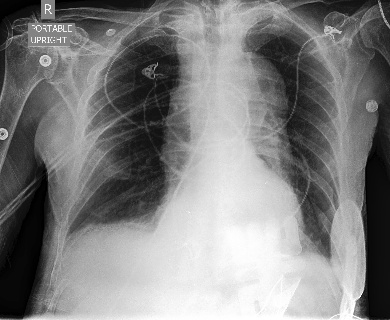

In [55]:
Image('/mnt/workspace/chexpert/' + row['Path'])

In [66]:
from medvqa.datasets.chexpert import (
    CHEXPERT_DATASET_DIR,
    CHEXPERT_CACHE_DIR,
    CHEXPERT_TRAIN_VAL_CSV_PATH,
)

In [70]:
df = pd.read_csv(CHEXPERT_TRAIN_VAL_CSV_PATH)
df_orien = df['Frontal/Lateral'] + df['AP/PA'].fillna('')
df_gender = df['Sex']
df_labels = df[CHEXPERT_LABELS]        
valid_rows = (df_orien != 'FrontalLL') & (df_orien != 'FrontalRL') & (df_gender != 'Unknown')

df_orien = df_orien[valid_rows].re
df_gender = df_gender[valid_rows]
df_labels = df_labels[valid_rows]
df_paths = df['Path'][valid_rows]

In [77]:
len(df_orien), len(df_orien.to_numpy())

(223630, 223630)

In [68]:
df_gender != 'Unknown'

0         True
1         True
2         True
3         True
4         True
          ... 
223643    True
223644    True
223645    True
223646    True
223647    True
Name: Sex, Length: 223648, dtype: bool